# Assignment 04


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import geopandas as gpd

In [2]:
datasets_dir = Path('../../../datasets')
# ls ../../

In [3]:
datasets_dir

WindowsPath('../../../datasets')

In [4]:
moscow_gdb_path = datasets_dir / 'moscow' / 'moscow_vectors' / 'Moscow.gdb'
print(moscow_gdb_path)
print(type(moscow_gdb_path))

..\..\..\datasets\moscow\moscow_vectors\Moscow.gdb
<class 'pathlib.WindowsPath'>


In [5]:
import fiona
moscow_gdb = str(moscow_gdb_path)

fiona.listlayers(moscow_gdb)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [6]:
parcels = gpd.read_file(moscow_gdb, layer='Parcels')
roads = gpd.read_file(moscow_gdb, layer='Centerlines')
zoning = gpd.read_file(moscow_gdb, layer='Moscow_Zoning')
city_limits = gpd.read_file(moscow_gdb, layer='Moscow_City_Limit')
parks = gpd.read_file(moscow_gdb, layer='Moscow_Parks')


In [7]:
parcels.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID', 'Shape_Length', 'Shape_Area',
       'geometry'],
      dtype='object')

In [8]:
parcels.head()

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LG_LINE_2,LG_LINE_3,LG_LINE_4,LG_LINE_5,LG_LINE_6,PM_PARC_CD,GlobalID,Shape_Length,Shape_Area,geometry
0,3725,RP39N05W203725,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,20 39 5,,,,,,{675E76EB-B256-413D-8A70-F5AA303470C6},8233.556159,1.269041e+06,"MULTIPOLYGON (((2310895.129 1842403.524, 23110..."
1,004J,RP39N05W20004J,LARSON-FOUNTAIN SKY RANCH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,20 39 5,,,,,WH,{313D5239-DF58-4258-A360-D61913D27224},1125.939702,2.429704e+04,"MULTIPOLYGON (((2311059.420 1842229.329, 23110..."
2,014A,RPM0496000014A,"REGAN, MAUREEN M TAYLOR",1810 LORIEN LN,,MOSCOW,ID,83843.0,1810 LORIEN,0.0,...,LOT 14,INDIAN HILLS 6TH ADD,BLK 2 LOT 2,,,,{5F7EE3E4-836A-4402-905D-5CC5BF65658A},573.162810,1.652831e+04,"MULTIPOLYGON (((2313927.891 1843762.528, 23140..."
3,0RRD,RPM03400010RRD,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,328 N MAIN,20190815.0,...,BLK 1,TAX #1912 OF RR LOT & LOT A,,,,LD,{49B94C50-6895-4EB5-8934-98D9F5C77F7D},323.999960,4.624991e+03,"MULTIPOLYGON (((2310936.696 1850758.583, 23109..."
4,0RRA,RPM03400010RRA,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,340 N MAIN,20190815.0,...,BLK 1 RR LOTS TAX #696,,,,,CC,{5EFD3778-A96A-4346-AC9B-A82DC91728BA},491.400684,1.440471e+04,"MULTIPOLYGON (((2310938.447 1850916.273, 23110..."


### Shapely geometries
Behind the scenes, geopandas is reading in vector data, storing the attribute tables as `pandas` dataframes,
and storing the vector geometry as `shapely` geometries.


### Reading:
To become more familiar with vector operations in geopandas/shapely, 
read this introduction to shapely geometries carefully, 
and reproduce/experiment with the code in this reading from within a blank notebook:
https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361

Read this page for a more comprehensive description of `shapely` geometries: 
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html

Scroll through the `shapely` user manual (https://shapely.readthedocs.io/en/stable/manual.html), 
reviewing the different functions that shapely includes.  `geopandas` allows all of these functions to be
executed, [directly through `geopandas`, without explicit call to `shapely`](https://geopandas.org/docs/user_guide/geometric_manipulations.html).  `shapely` is just running
quietly under the hood.  Pay specific attention to the "Spatial Analysis Methods" of the manual.

In [9]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1), (2, 0)])
print('Line area =', line.area)
print('Line length =', line.length)

Line area = 0.0
Line length = 2.8284271247461903


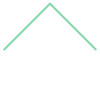

In [10]:
line

In [11]:
type(line)

shapely.geometry.linestring.LineString

In [12]:
print( list(line.coords) )
print( line.coords[2] )

[(0.0, 0.0), (1.0, 1.0), (2.0, 0.0)]
(2.0, 0.0)


<div class="alert alert-block alert-warning">

## 1. Shapely geometries
What `shapely` geometry are each of the parcels in the Moscow parcels layer? What `shapely` geometry are their centroids?
    
Find the Kenworthy Theater within the parcels database (hint: the name field for its mailing address, 
    PM_MAIL_NM, is "KENWORTHY PERFORMING ARTS CTR").
What are the coordinates for the corners of its parcel?    
</div>


**investigating the data first. . .**

In [13]:
type(parcels) 

geopandas.geodataframe.GeoDataFrame

In [14]:
type(parcels.geometry)

geopandas.geoseries.GeoSeries

In [15]:
parcels.head()

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LG_LINE_2,LG_LINE_3,LG_LINE_4,LG_LINE_5,LG_LINE_6,PM_PARC_CD,GlobalID,Shape_Length,Shape_Area,geometry
0,3725,RP39N05W203725,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,20 39 5,,,,,,{675E76EB-B256-413D-8A70-F5AA303470C6},8233.556159,1.269041e+06,"MULTIPOLYGON (((2310895.129 1842403.524, 23110..."
1,004J,RP39N05W20004J,LARSON-FOUNTAIN SKY RANCH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,20 39 5,,,,,WH,{313D5239-DF58-4258-A360-D61913D27224},1125.939702,2.429704e+04,"MULTIPOLYGON (((2311059.420 1842229.329, 23110..."
2,014A,RPM0496000014A,"REGAN, MAUREEN M TAYLOR",1810 LORIEN LN,,MOSCOW,ID,83843.0,1810 LORIEN,0.0,...,LOT 14,INDIAN HILLS 6TH ADD,BLK 2 LOT 2,,,,{5F7EE3E4-836A-4402-905D-5CC5BF65658A},573.162810,1.652831e+04,"MULTIPOLYGON (((2313927.891 1843762.528, 23140..."
3,0RRD,RPM03400010RRD,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,328 N MAIN,20190815.0,...,BLK 1,TAX #1912 OF RR LOT & LOT A,,,,LD,{49B94C50-6895-4EB5-8934-98D9F5C77F7D},323.999960,4.624991e+03,"MULTIPOLYGON (((2310936.696 1850758.583, 23109..."
4,0RRA,RPM03400010RRA,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,340 N MAIN,20190815.0,...,BLK 1 RR LOTS TAX #696,,,,,CC,{5EFD3778-A96A-4346-AC9B-A82DC91728BA},491.400684,1.440471e+04,"MULTIPOLYGON (((2310938.447 1850916.273, 23110..."


Because the GeoDataFrame contains only one GeoSeries, I don't have to specify the vector **parcels.geometry**. There is only one geometry type: MultiPolygon. https://geopandas.readthedocs.io/en/latest/docs/user_guide/data_structures.html

In [16]:
parcels.geom_type #method 1

0       MultiPolygon
1       MultiPolygon
2       MultiPolygon
3       MultiPolygon
4       MultiPolygon
            ...     
7389    MultiPolygon
7390    MultiPolygon
7391    MultiPolygon
7392    MultiPolygon
7393    MultiPolygon
Length: 7394, dtype: object

In [17]:
parcels.geometry.geom_type #method 2

0       MultiPolygon
1       MultiPolygon
2       MultiPolygon
3       MultiPolygon
4       MultiPolygon
            ...     
7389    MultiPolygon
7390    MultiPolygon
7391    MultiPolygon
7392    MultiPolygon
7393    MultiPolygon
Length: 7394, dtype: object

In [18]:
parcels.geometry #method 3

0       MULTIPOLYGON (((2310895.129 1842403.524, 23110...
1       MULTIPOLYGON (((2311059.420 1842229.329, 23110...
2       MULTIPOLYGON (((2313927.891 1843762.528, 23140...
3       MULTIPOLYGON (((2310936.696 1850758.583, 23109...
4       MULTIPOLYGON (((2310938.447 1850916.273, 23110...
                              ...                        
7389    MULTIPOLYGON (((2309810.585 1844883.291, 23097...
7390    MULTIPOLYGON (((2309630.922 1844876.652, 23096...
7391    MULTIPOLYGON (((2309722.005 1844975.767, 23097...
7392    MULTIPOLYGON (((2309711.261 1844923.808, 23096...
7393    MULTIPOLYGON (((2315750.007 1843514.088, 23157...
Name: geometry, Length: 7394, dtype: geometry

In [19]:
type(parcels.PM_MAIL_NM)

pandas.core.series.Series

In [20]:
from shapely.geometry import LineString, GeometryCollection, Point, Polygon

**Approach 1:** select the object by name and print its coordinates (because it is a MultiPolygon, its geometric propeties are already defined and I should be able to use the .methods to return them).

In [21]:
# parcels.set_index('PM_MAIL_NM', inplace=True)
# ken= parcels.loc['KENWORTHY PERFORMING ARTS CTR']
# type(ken)
# ken

# !!!!!doing it this way turns it into a pd.Series which prohibits use of gpd and shapely!!!!!

In [22]:
ken = parcels[parcels['PM_MAIL_NM']=='KENWORTHY PERFORMING ARTS CTR']

In [23]:
type(ken)

geopandas.geodataframe.GeoDataFrame

In [24]:
ken

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LG_LINE_2,LG_LINE_3,LG_LINE_4,LG_LINE_5,LG_LINE_6,PM_PARC_CD,GlobalID,Shape_Length,Shape_Area,geometry
1359,002B,RPM0001005002B,KENWORTHY PERFORMING ARTS CTR,508 S MAIN,,MOSCOW,ID,83843.0,508 S MAIN,20010202.0,...,"BLK 5 LOT 2, N 1/2 OF LOT 3",EXEMPT,,,,C,{A4FB5B11-A87D-453A-ABD6-8BC607A17A20},369.999919,7499.997375,"MULTIPOLYGON (((2311036.946 1848531.880, 23110..."


In [25]:
print(ken.geometry)

1359    MULTIPOLYGON (((2311036.946 1848531.880, 23110...
Name: geometry, dtype: geometry


In [26]:
print(ken.exterior)

1359    None
dtype: geometry


In [27]:
print(list(ken.geometry))

Well, those methods are useless.

**Approach 3:** this is the brute-force, but somehow simpler, way of doing what was attempted in Approach 2. Since there was no obvious/intuitive way to get the results.

In [28]:
ken.bounds

,minx,miny,maxx,maxy
1359,2.310911e+06,1.848472e+06,2.311037e+06,1.848533e+06


In [29]:
ken.total_bounds

array([2310911.28507024, 1848471.8833809 , 2311036.94590816,
       1848533.27236574])

In [30]:
kv = ken.total_bounds

In [31]:
ken_poly = Polygon([
    (kv[0],kv[1]),
    (kv[2],kv[1]),
    (kv[2],kv[3]),
    (kv[0],kv[3])
])

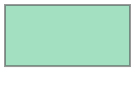

In [32]:
ken_poly

In [33]:
ken_poly.exterior.coords.xy

(array('d', [2310911.285070244, 2311036.9459081627, 2311036.9459081627, 2310911.285070244, 2310911.285070244]),
 array('d', [1848471.8833809048, 1848471.8833809048, 1848533.2723657414, 1848533.2723657414, 1848471.8833809048]))

**Finally, to return the (cleanish) coordinates.** I could go one more step and name 4 points from these vertices.

In [34]:
print(ken_poly.exterior)

LINEARRING (2310911.285070244 1848471.883380905, 2311036.945908163 1848471.883380905, 2311036.945908163 1848533.272365741, 2310911.285070244 1848533.272365741, 2310911.285070244 1848471.883380905)


**Can just ignore now:**

**Approach 2:** because the GeoSeries geometry is special, I should be able to index the coordinates and put them in an array. Might have to convert to a regular polygon first.
https://gis.stackexchange.com/questions/287306/list-all-polygon-vertices-coordinates-using-geopandas

https://stackoverflow.com/questions/64099107/convert-multipolygon-geometry-into-list

https://gis.stackexchange.com/questions/180142/converting-shapely-multipolygon-to-polygon-technique-doesnt-always-work



In [35]:
ken_coordslist = [ken.exterior.coords for poly in list(ken.geometry)]

AttributeError: 'GeoSeries' object has no attribute 'coords'

In [ ]:
vertices = [list(ken.exterior.coords) for x in ken.geometry]

In [ ]:
v = list[i for i in ken.geometry]
x,y = v[0].exterior.coords.xy
coords = np.dstack((x,y)).tolist()

**Question 1, part b.**

FACILITYID                                               PR-E17-G
NAME                                                Ghormley Park
SUBTYPEFIELD                                                    0
FEATURECODE                                                      
FULLADDR                                              504 Home St
OPERDAYS                                                         
OPERHOURS                                                        
PARKAREA                                                     7.34
PARKURL         https://www.ci.moscow.id.us/parks-rec/parks/Pa...
NUMPARKING                                                    0.0
RESTROOM                                                      Yes
ADACOMPLY                                                        
CAMPING                                                        No
SWIMMING                                                       No
HIKING                                                         No
FISHING   

<AxesSubplot:>

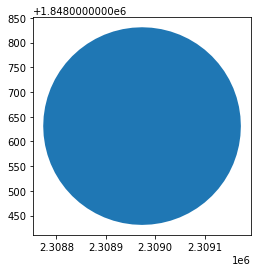

In [36]:
i = 2 # Look at one park, for example
print(parks.iloc[i])

buffer_radius = 200 # What are the units for this?

buffered_park = parks.iloc[i:i+1].buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
    #If you use just one index, it seems to remove all the geopandas properties of the data
buffered_park.plot()



In [37]:
buffered_park.area

2    125461.939622
dtype: float64

In [38]:
from numpy import pi

In [39]:
bpa = pi*200**2

In [40]:
bpa

125663.70614359173

In [41]:
bpa-buffered_park.area

2    201.766522
dtype: float64

In [42]:
parcels.crs

<Projected CRS: EPSG:2243>
Name: NAD83 / Idaho West (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Idaho - counties of Ada; Adams; Benewah; Boise; Bonner; Boundary; Canyon; Clearwater; Elmore; Gem; Idaho; Kootenai; Latah; Lewis; Nez Perce; Owyhee; Payette; Shoshone; Valley; Washington.
- bounds: (-117.24, 41.99, -114.32, 49.01)
Coordinate Operation:
- name: SPCS83 Idaho West zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

According to the CRS, the units are feet and shapely derives units from the data it is used on. However, the expected area is smaller by almost 202 sqft. . .

In [43]:
pi

3.141592653589793

In [44]:
buffered_park.area/200**2

2    3.136548
dtype: float64

. . .because of the precision of pi in gpd!

<div class="alert alert-block alert-warning">

## 2. Identifying Moscow residents underserved by city parks.
You're an urban planner consulting with the City of Moscow.  The city is interested in increasing the number of parks
    within the city, and better designing those parks to meet the needs of those who are currently underserved
    by the city's existing parks.  The city wants to begin the planning process by reaching out to these currently
    underserved residents, but first the city needs to know who they are.
    
The city asks you to produce a list of all resident addresses within the city limits whose property is at least 1000 feet
    from a current park.
    
To properly address the letters and questionaires that the city will be sending out, the city would like this list
    of residents as a csv file, with each property address on a separate line (property addresses are represented within
    the parcels database by the field name "PM_PROP_AD").  Produce this file and a map of the underserved parcels.
    


</div>

In [45]:
from geopandas.tools import sjoin # have this ready just in case

In [46]:
zoning.set_index('LANDUSECODE', inplace=True)

In [47]:
zoning.head()

,LANDUSEDESC,BASEELEV,HEIGHT,LASTUPDATE,LASTEDITOR,SUBTYPECODE,SUBTYPEDESC,PARCELID,ADDRESS,LOCDESC,GlobalID,SHAPE_Length,SHAPE_Area,geometry
LANDUSECODE,,,,,,,,,,,,,,
111,Auto-Urban Residential,None,None,2017-01-01T00:00:00+00:00,None,None,Single Family Residential,RPM11000010040,856 N Garfield St,,{D1CDFE80-F20E-4A7F-A6FE-61F956BA3ABF},1259.873360,72225.370599,MULTIPOLYGON Z (((2314900.119 1852432.172 0.00...
750,University,None,None,2017-01-01T00:00:00+00:00,None,None,Public Parking,RPM1110002001A,725 W Sixth St LOT 15,,{037ACFD7-39A7-4F64-85F1-4CD9B4B556E0},495.250762,14883.271878,MULTIPOLYGON Z (((2308808.447 1848161.226 0.00...
750,University,None,None,2017-01-01T00:00:00+00:00,None,None,Public Parking,RPM11100010050,618 Ash St LOT 16,,{8EA5F61E-2673-4CFF-BB74-E88A6E7CD452},320.000003,4800.000103,MULTIPOLYGON Z (((2308964.486 1847976.075 0.00...
750,University,None,None,2017-01-01T00:00:00+00:00,None,None,Public Parking,RPM1110001006A,622 Ash St LOT 16,,{4847C34D-9D8D-4131-95EE-3B094B4A77DB},440.000004,12000.000546,MULTIPOLYGON Z (((2308962.799 1847876.089 0.00...
750,University,None,None,2017-01-01T00:00:00+00:00,None,None,Public Parking,RPM1110001009A,630 Ash St LOT 16,,{83339838-B907-4C77-B2D1-20BE22846523},346.905350,6397.201123,MULTIPOLYGON Z (((2308842.478 1847858.117 0.00...


In [48]:
ResidentZones=zoning.loc[['109','110','111','115','120']]

In [49]:
type(ResidentZones)

geopandas.geodataframe.GeoDataFrame

In [50]:
ResidentZones.head()

,LANDUSEDESC,BASEELEV,HEIGHT,LASTUPDATE,LASTEDITOR,SUBTYPECODE,SUBTYPEDESC,PARCELID,ADDRESS,LOCDESC,GlobalID,SHAPE_Length,SHAPE_Area,geometry
LANDUSECODE,,,,,,,,,,,,,,
109,"Auto-Urban Residential, Medium Density",None,None,2017-01-01T00:00:00+00:00,None,None,Single Family Residential,RPM12100350010,805 Kenneth St,,{AA6B3D19-67C4-4247-BB76-B23BE8E99AF5},438.000005,11880.000296,MULTIPOLYGON Z (((2313592.600 1845924.555 0.00...
109,"Auto-Urban Residential, Medium Density",None,None,2017-01-01T00:00:00+00:00,None,None,Single Family Residential,RPM12100340010,813 Kenneth St,,{7A920C4D-9603-449C-92A6-3DF90B4A06BE},672.000044,23463.004853,MULTIPOLYGON Z (((2313690.180 1845806.368 0.00...
109,"Auto-Urban Residential, Medium Density",None,None,2017-01-01T00:00:00+00:00,None,None,Single Family Residential,RPM1210035002A,1214 Lynn Ave,,{CDA1949C-D66D-4857-BBAE-6C0EFEF1B173},860.077664,28633.004533,MULTIPOLYGON Z (((2313588.772 1845607.578 0.00...
109,"Auto-Urban Residential, Medium Density",None,None,2017-01-01T00:00:00+00:00,None,None,Single Family Residential,RPM12100340020,808 White Ave,,{69D86FFC-7E45-4D8F-884B-853ED31E6BA3},597.999992,19799.999927,MULTIPOLYGON Z (((2313588.772 1845607.578 0.00...
109,"Auto-Urban Residential, Medium Density",None,None,2017-01-01T00:00:00+00:00,None,None,Single Family Residential,RPM12500000120,835 Kenneth St,,{6B409E36-5D20-4B1E-9E2D-9077D6996007},462.141555,12822.639461,MULTIPOLYGON Z (((2313889.456 1845910.890 0.00...


(1837691.7277759165, 1858582.946164012)

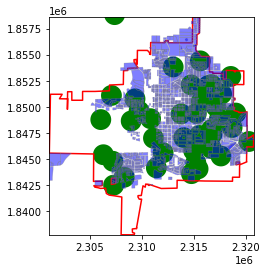

In [51]:
# %matplotlib widget #
# Map preview of all relevant data; needs refining

BufferRadius = 1000 

fig, ax = plt.subplots()
parks.buffer(BufferRadius).plot(ax=ax, color='g', alpha = 1)
#city_limits.plot(ax=ax, color=None, edgecolor='r') # color=None defaults to fill solid blue
city_limits.plot(ax=ax, facecolor='none', edgecolor='r', lw=1.5) 
ResidentZones.plot(ax=ax, facecolor='blue', edgecolor='gray', alpha = 0.5, lw=0.5)
#roads.plot(ax=ax)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

**Approach 1:** Now just get those light blue areas within city limits! 
  
    * intersection of parcels and ResidentZones as ResidentNames
    * clip of ResidentNames and city_limits as CityResidents
    * clip of CityResidents and parks.buffer() as CityParks --misleading name, I know
    * difference overlay CityResidents and CityParks

Plot a tidy map and write a tidy mailing list .csv

In [56]:
#BufferRadius = 1000
ResidentNames = gpd.overlay(parcels, ResidentZones, how='intersection')

C:\Users\q\AppData\Local\Temp/ipykernel_5624/2373259037.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  ResidentNames = gpd.overlay(parcels, ResidentZones, how='intersection')


In [57]:
CityResidents = gpd.clip(ResidentNames, city_limits)

In [67]:
ParkProximity = parks.buffer(BufferRadius)

In [77]:
CityParks = gpd.clip(CityResidents, parks.buffer(BufferRadius))

In [65]:
### old attempt ### CityParks = gpd.clip(parks, city_limits)

<AxesSubplot:>

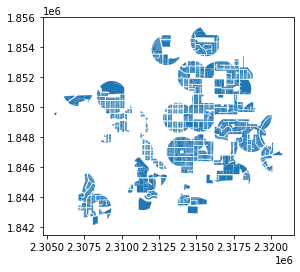

In [76]:
CityParks.plot()

<AxesSubplot:>

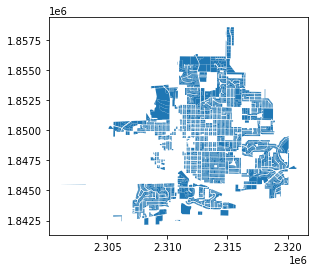

In [74]:
CityResidents.plot()

In [78]:
underserved = gpd.overlay(CityResidents, CityParks, how = 'difference')

<AxesSubplot:>

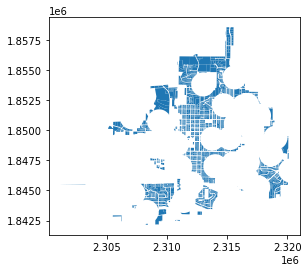

In [79]:
underserved.plot() # yep

In [145]:
fig, ax = plt.subplots(figsize=(9,9))
underserved.plot(ax=ax, color = 'blue', label = 'Underserved Residents')
city_limits.plot(ax=ax, facecolor='none', edgecolor='red', lw=1.5, label = 'Moscow City Limits')
CityParks.plot(ax=ax, color='g', label = '1000ft radius from City Parks', alpha = 0.35, )
roads.plot(ax=ax, color= 'gray', alpha = 0.5, label = 'Roads')
ax.set_title('Locations of Underserved Moscow Residents\n (Blue) Within City Limits', fontsize = 'x-large', family = 'serif')
#plt.legend(loc="upper left") #legend needs more troubleshooting
#plt.legend([underserved, CityParks, city_limits])
#plt.legend([underserved, CityParks, city_limits],['Underserved Residents','1000 ft radius from City Parks', 'City Limits'])
ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1837691.7277759165, 1858582.946164012)

In [87]:
underserved.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID_1', 'Shape_Length', 'Shape_Area',
       'LANDUSEDESC', 'BASEELEV', 'HEIGHT', 'LASTUPDATE', 'LASTEDITOR',
       'SUBTYPECODE', 'SUBTYPEDESC', 'PARCELID', 'ADDRESS', 'LOCDESC',
       'GlobalID_2', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [91]:
underserved.head(20)    # 'PM_MAIL_NM' for Resident Names, 'PM_MAIL_A1' (and _A2, technically) as mailing address
                        # 'Address' does not have unique values and values do not match PM_MAIL_A1
                        # there are business/other organizations operating in residential zones

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LASTEDITOR,SUBTYPECODE,SUBTYPEDESC,PARCELID,ADDRESS,LOCDESC,GlobalID_2,SHAPE_Length,SHAPE_Area,geometry
0,3725,RP39N05W203725,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,None,None,Single Family Residential,RPM00000190010,2016 Main St,,{A4FB52A4-E1CE-4235-9BEF-8EDF025F69D6},317.708891,6257.095467,"POLYGON Z ((2310762.450 1842514.509 0.000, 231..."
1,3040,RPM00000203040,TATKINMAH LLC,709 E F STREET,,MOSCOW,ID,83843.0,,20120925.0,...,None,None,Single Family Residential,RPM00000190010,2016 Main St,,{A4FB52A4-E1CE-4235-9BEF-8EDF025F69D6},317.708891,6257.095467,"POLYGON Z ((2310767.544 1842532.973 0.000, 231..."
2,0010,RPM00000190010,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,2016 S MAIN,20120925.0,...,None,None,Single Family Residential,RPM00000190010,2016 Main St,,{A4FB52A4-E1CE-4235-9BEF-8EDF025F69D6},317.708891,6257.095467,"POLYGON Z ((2310762.839 1842532.869 0.000, 231..."
23,0RRA,RPM03400010RRA,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,340 N MAIN,20190815.0,...,None,None,Single Family Residential,RPM03400010RRB,111 E D St,,{9EA5CB9E-4735-4CE5-AD7B-27B255587812},287.879565,4518.246690,"POLYGON Z ((2311056.308 1850903.063 0.000, 231..."
24,014A,RPM0340001014A,"RATHBUN, BARBRA E",329 N WASHINGTON ST,,MOSCOW,ID,83843.0,329 N WASHINGTON,20000127.0,...,None,None,Single Family Residential,RPM03400010RRB,111 E D St,,{9EA5CB9E-4735-4CE5-AD7B-27B255587812},287.879565,4518.246690,"POLYGON Z ((2311082.421 1850823.059 0.000, 231..."
25,0RRB,RPM03400010RRB,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,111 E D,20190815.0,...,None,None,Single Family Residential,RPM03400010RRB,111 E D St,,{9EA5CB9E-4735-4CE5-AD7B-27B255587812},287.879565,4518.246690,"POLYGON Z ((2311096.734 1850837.846 0.000, 231..."
32,015A,RPM0240004015A,"CHURCH, CHRISTIAN SCIENCE",PO BOX 9726,,MOSCOW,ID,83843.0,1573 E 3RD,20090420.0,...,None,None,Multi-Family Residential,RPM02400040100,1549 E Third St,,{999A81A0-BDA5-4363-902F-84FBE62BAA6C},499.486383,15509.141427,"POLYGON Z ((2316146.889 1848991.434 0.000, 231..."
35,0140,RPM02400040140,"FREI, HERBERT A",1572 DOGWOOD CT,,MOSCOW,ID,83843.0,1572 DOGWOOD,20080314.0,...,None,None,Multi-Family Residential,RPM02400040100,1549 E Third St,,{999A81A0-BDA5-4363-902F-84FBE62BAA6C},499.486383,15509.141427,"POLYGON Z ((2316146.348 1848898.536 0.000, 231..."
36,007B,RPM0340003007B,"SISCHO, WILLIAM M",227 N JEFFERSON ST,,MOSCOW,ID,83843.0,227 N JEFFERSON,20070618.0,...,None,None,Single Family Residential,RPM0340003010C,E C St,,{0A50D3A4-942C-4058-A62C-42225A6CD437},360.000024,7200.001582,"POLYGON Z ((2311426.401 1850278.775 0.000, 231..."
37,010C,RPM0340003010C,"RICH, JOHN A",1118 PINECREST ROAD,,MOSCOW,ID,83843.0,,19830606.0,...,None,None,Single Family Residential,RPM0340003010C,E C St,,{0A50D3A4-942C-4058-A62C-42225A6CD437},360.000024,7200.001582,"POLYGON Z ((2311475.976 1850290.268 0.000, 231..."


In [120]:
mailinglist = underserved[['PM_MAIL_NM','PM_MAIL_A1']]

In [114]:
mailinglist

pandas.core.frame.DataFrame

In [110]:
len(mailinglist['PM_MAIL_NM'].unique())

2443

In [111]:
len(mailinglist['PM_MAIL_A1'].unique()) # mail by unique address to prevent spamming 132 folks

2311

In [121]:
mailinglist = mailinglist.drop_duplicates(subset='PM_MAIL_A1')

In [123]:
len(mailinglist)

2311

In [124]:
mailinglist

,PM_MAIL_NM,PM_MAIL_A1
0,TATKINMAH LLC,709 E F ST
1,TATKINMAH LLC,709 E F STREET
23,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN
24,"RATHBUN, BARBRA E",329 N WASHINGTON ST
32,"CHURCH, CHRISTIAN SCIENCE",PO BOX 9726
...,...,...
11069,"KELLAS, JOHN J JR",420 SUNSET DRIVE
11073,"KOCHAN, ELIZABETH L",1107 VIRGINIA AVE
11086,PHI KAPPA TAU CORPORATION,1630 HWY 99
11142,KUNTZ CONSTRUCTION LLC,PO BOX 8650


In [125]:
mailinglist = mailinglist.drop_duplicates(subset='PM_MAIL_NM')

In [126]:
len(mailinglist) # turns out there are names with variations of the same addresses, so I've decided to drop those too
                    # which results in sacrifice any different residents with the same name, oh well

2267

In [127]:
mailinglist # safe to assume this is cleaned enough, the NA/NULL values are gone too
# other considerations: for easy printing create a column for names and addresses as they would appear on an envelope
# take out the non-residents

,PM_MAIL_NM,PM_MAIL_A1
0,TATKINMAH LLC,709 E F ST
23,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN
24,"RATHBUN, BARBRA E",329 N WASHINGTON ST
32,"CHURCH, CHRISTIAN SCIENCE",PO BOX 9726
35,"FREI, HERBERT A",1572 DOGWOOD CT
...,...,...
11069,"KELLAS, JOHN J JR",420 SUNSET DRIVE
11073,"KOCHAN, ELIZABETH L",1107 VIRGINIA AVE
11086,PHI KAPPA TAU CORPORATION,1630 HWY 99
11142,KUNTZ CONSTRUCTION LLC,PO BOX 8650


**lastly create the .csv**

In [131]:
mailinglist.to_csv('mailout.csv') # put in cwd otherwise use (path_or_buf='')

<div class="alert alert-block alert-info"> <i> Tim's code for reference. . . </i> </div>

In [ ]:
roads

In [ ]:
zoning.columns

In [92]:
zoning['LANDUSEDESC'].unique()

array(['Auto-Urban Residential', 'University',
       'Parks, Recreation, and Open Space',
       'Auto-Urban Residential, Medium Density', 'Urban Commercial',
       'Urban Residential, Medium Density', 'Urban Residential',
       'Suburban Residential', 'Public and Semi-Public',
       'Auto-Urban Commercial', 'Vacant', 'Auto-Urban Industrial',
       'Agricultural', 'Research/Technology Park', '',
       'Suburban Commercial'], dtype=object)

In [ ]:
zoning['LANDUSECODE'].unique()

In [ ]:
# We can measure the distance between any parcel and a point near the center of downtown Moscow
from shapely.geometry import Point
parcels['Dwntn_dist'] = parcels.distance(Point(2.311e6, 1.849e6))

#### Visualizing the data
I think each of the plots below is interesting.  Try commenting and uncommenting each one

In [138]:
%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )

# These are a few of the interesting plots to look at.
#parcels.plot(column='Dwntn_dist', ax=ax, legend=True, vmax=5280); # column not in gdf
zoning.plot(column='LANDUSEDESC', ax=ax, legend=True, cmap='tab20')
#parcels.plot(column= 'SaleYear', ax=ax, legend=True, vmin=1990) # column not in gdf, use PM_DEEDCDT with converted date

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

### Property sales over time
Similar to the assignment from last week, we can look at the property sales as a function of time.

In [ ]:
import pandas as pd
print( parcels['PM_DEEDCDT'].astype(str)[:4] )

parcels['SaleDate'] = pd.to_datetime(
    parcels['PM_DEEDCDT'], 
    errors='coerce', 
    format='%Y%m%d')


In [ ]:
parcels['SaleDate']

In [ ]:
dates = parcels['PM_DEEDCDT'].to_numpy() # Pull out all the sale dates (initially floats)
yr = np.full( dates.shape, np.nan ) # initialize a variable full of nans

for i in range(len(dates)): 
    if dates[i] > 0:
        yr[i] = int( str(dates[i])[:4] )
    else:
        yr[i] = np.nan

parcels['SaleYear'] = yr # Create a new column for the parcels data frame representing sale year


In [ ]:
bin_size = np.timedelta64(365, 'D')/12 # days
fig, ax = plt.subplots()
ax.hist(parcels['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ) )
ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') );
# ax.set_xlim(np.datetime64('2010-12-15'), np.datetime64('2011-01-01') )

# Note that the sales at the end of 2010 are anomalous, and are all recorded on the same day.
# That's suspicious and Tim thinks that it must be some change in accounting or record keeping.

<div class="alert alert-block alert-info"> <i> . . .End of Tim's reference code. </i> </div>

<div class="alert alert-block alert-warning">

## 3. Investing in downtown property
You are the GIS consultant for a property investment company that specializes in
downtown and higher-density properties.  Your company is considering Moscow real estate.
You've heard about the boom in sales within the city, and your company would like to know how competitive
property purchasing will be, or if they will be able to drive a hard bargin.

Has the downtown property market heated up as much as within the city as a whole?
Compare sale rates within two of the zoned downtown regions with those of the city as a whole.
    
Is there anything else in these data that you would like to share with your colleagues
    that could help advise them as you consider this investment?
</div>

<div class="alert alert-block alert-warning">

## 4. Find, plot, work with data of your own
Find a spatial, vector dataset of your choosing (by googling, from another class, 
    or from a research project of yours). This could be climate data, geologic units,
    census data, ecological units, demographic data, etc. Download or copy this dataset
    into the current directory, plot it, and use geopandas to draw on the attributes 
    of that data (even just lengths, areas, etc) and tell me something about that data.
</div>